In [1]:
# Effect size using Cohen's d (d-value).
"""
Effect size analysis using Cohen's d and comparison with p-value.
This script generates synthetic data for two groups, computes
Cohen's d, performs an independent t-test, and visualizes results.
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data generation
np.random.seed(42)

group_A = np.random.normal(loc=70, scale=10, size=100)
group_B = np.random.normal(loc=75, scale=10, size=100)

In [2]:
# Statistical significance and t-test
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=True)

print(f"t-test: {t_stat:.2f}")
print(f"p-value: {p_value:.7f}")

t-test: -4.75
p-value: 0.0000038


In [3]:
#  Cohen's d (effect size) - d-value.
def cohens_d(x, y):
    n1, n2 = len(x), len(y)
    mean1, mean2 = np.mean(x), np.mean(y)
    std1, std2 = np.std(x, ddof=1), np.std(y, ddof=1)

    pooled_std = np.sqrt(
        ((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2)
    )

    return (mean1 - mean2) / pooled_std

d_value = cohens_d(group_A, group_B)
print(f"Cohen d: {d_value:.2f}")

Cohen d: -0.67


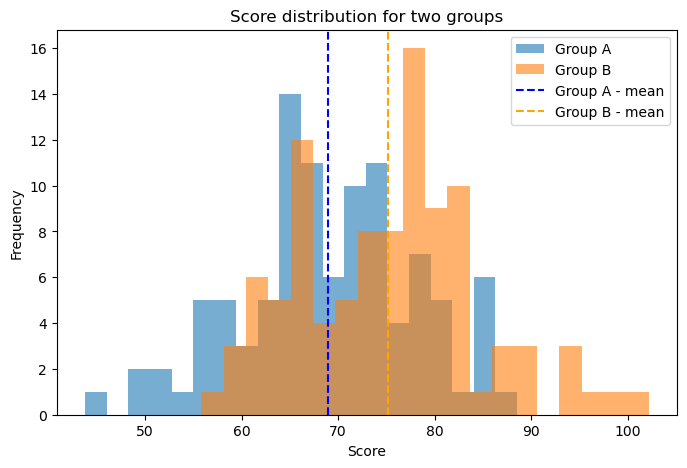

In [4]:
# Data visualisation - comparison of distributions
plt.figure(figsize=(8, 5))
plt.hist(group_A, bins=20, alpha=0.6, label="Group A")
plt.hist(group_B, bins=20, alpha=0.6, label="Group B")

plt.axvline(np.mean(group_A), linestyle="--", label="Group A - mean", color="blue")
plt.axvline(np.mean(group_B), linestyle="--", label="Group B - mean", color="orange")

plt.title("Score distribution for two groups")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

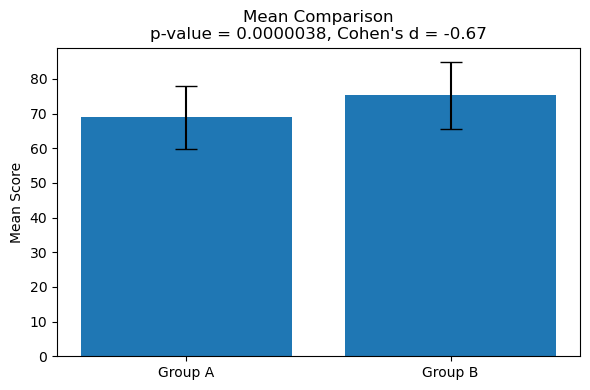

In [5]:
# Data visualisation - mean comparison with p-value and Cohen's d (effect size)
means = [np.mean(group_A), np.mean(group_B)]
stds = [np.std(group_A, ddof=1), np.std(group_B, ddof=1)]

plt.figure(figsize=(6, 4))
plt.bar(["Group A", "Group B"], means, yerr=stds, capsize=8)

plt.title(
    f"Mean Comparison\np-value = {p_value:.7f}, Cohen's d = {d_value:.2f}"
)
plt.ylabel("Mean Score")
plt.tight_layout()
plt.show()

In [6]:
# Conclusions

"""
A low p-value means that the data is statistically significant,
while an increased Cohen's d coefficient indicates that the difference is significant,
which accurately reflects the data, as it shows that the data being studied differs, which is a desirable situation.
We are dealing with statistical significance, but the data differs.
"""

"\nA low p-value means that the data is statistically significant,\nwhile an increased Cohen's d coefficient indicates that the difference is significant,\nwhich accurately reflects the data, as it shows that the data being studied differs, which is a desirable situation.\nWe are dealing with statistical significance, but the data differs.\n"